In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [95]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [94]:
uncommon_columns = list(set(train.columns).symmetric_difference(set(test.columns)))
print("Uncommon columns:", uncommon_columns)

Uncommon columns: ['ID', 'matched_score']


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start_dates                   

In [5]:
train.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start_dates                   

In [82]:
test.shape

(1909, 35)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start_dates                   

In [10]:
train.isnull().mean() * 100

address                                91.709234
career_objective                       50.307793
skills                                  0.563196
educational_institution_name            0.798952
degree_names                            0.798952
passing_years                           0.798952
educational_results                     0.798952
result_types                            0.798952
major_field_of_studies                  0.798952
professional_company_names              0.877538
company_urls                            0.877538
start_dates                             0.877538
end_dates                               0.877538
related_skils_in_job                    0.877538
positions                               0.877538
locations                               0.877538
responsibilities                        0.000000
extra_curricular_activity_types        64.217420
extra_curricular_organization_names    64.217420
extra_curricular_organization_links    64.217420
role_positions      

In [15]:
train["skills"].isnull().mean()

0.0056319580877537655

In [16]:
train.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [18]:
train[~train["address"].isnull()]

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
14,"Sunnyvale, CA",Soon-to-be Computer Science graduate eager to ...,"['Java', 'Spring', 'Javascript', 'CSS', 'HTML'...",['University of Santa Clara'],['Bachelor of Science'],['current'],['3.6'],['GPA'],['Computer Science'],"['Genesis10', 'Novalsys, Inc']",...,"[None, None]","[None, None]","[None, None]",Mechanical Engineer,Bachelor of Science (BSc) in Mechanical Engine...,2 to 5 years,Age 25 to 40 years,Machinery Maintenance\nTroubleshooting\nReport...,Maintenance and Troubleshooting\nMechanical,0.583333
18,"Sunnyvale, CA",Soon-to-be Computer Science graduate eager to ...,"['Java', 'Spring', 'Javascript', 'CSS', 'HTML'...",['University of Santa Clara'],['Bachelor of Science'],['current'],['3.6'],['GPA'],['Computer Science'],"['Genesis10', 'Novalsys, Inc']",...,"[None, None]","[None, None]","[None, None]",Project Coordinator (Civil),•Bachelor of Business Administration (BBA) in ...,5 to 10 years,Age 30 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,Auto CAD 2D 3D\nCivil 3D\nCivil Construction\n...,0.333333
25,"Trenton, NJ",Dedicated and well-rounded software engineer w...,"['HTML', 'CSS', 'JavaScript (Angular)', 'Pytho...",['Princeton International School of Mathematic...,"['Master of Science', 'Bachelor of Science']","['2015', '2012']","['N/A', 'N/A']","[None, None]","['Computer Science', 'Computer Science']",['Princeton International School of Mathematic...,...,"[None, None]","[None, None]","[None, None]",Mechanical Engineer,Bachelor of Science (BSc) in Mechanical Engine...,2 to 5 years,Age 25 to 40 years,Machinery Maintenance\nTroubleshooting\nReport...,Maintenance and Troubleshooting\nMechanical,0.650000
34,"10 King's College Road, Rm. 3302 Toronto, Onta...",NaN,"['Python', 'Java', 'Julia', 'R', 'Matlab', 'Un...","['University of Toronto', 'University of Toron...","['PhD', 'M.S.', 'B.S.']","['2017', '2013', '2010']","['3.83', '3.93', '3.73']","['GPA', 'GPA', 'GPA']","['Computer Science', 'Computer Science', 'Comp...","['Microsoft Research', 'University of Toronto,...",...,NaN,NaN,NaN,Executive/ Sr. Executive -IT,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,NaN,0.850000
38,"City, State Zip Code",NaN,"['CPR & First Aid Certified', 'Proficient in M...",['Southeastern Louisiana University'],['Bachelor of Science'],['2025'],['3.1'],['GPA'],['Biological Sciences'],"['SLU Food Services', 'Self-Employed']",...,[None],[None],[None],Data Engineer,Bachelor of Science (BSc),5 to 8 years,NaN,Data Platform Design\nData Pipeline Developmen...,Azure\nBig Data\nData Analytics\nETL Tools\nPo...,0.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,"Vancouver, BC",Senior Computer Vision Scientist with 10+ year...,"['Snowflake', 'Python', 'C++', 'R', 'SQL', 'Ta...",['University of British Columbia'],['B.S.'],['2013'],['N/A'],['N/A'],['Engineering'],"['AbCellera', 'Microsoft', 'Swiss Re']",...,"[None, None]","[None, None]","[None, None]","Full Stack Developer (Python,React js)",Bachelor/Honors,3 to 7 years,NaN,"Full Stack Development\nFront-end: ReactJS, Ne...",NaN,0.850000
7618,"City, State Zip Code",NaN,"['CPR & First Aid Certified', 'Proficient in M...",['Southeastern Louisiana University'],['Bachelor of Science'],['2025'],['3.1'],['GPA'],['Biological Sciences'],"['SLU Food Services', 'Self-Employed']",...,[None],[None],[None],Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.650000
7622,"Virginia Beach, VA",NaN,"['automotive', 'basic', 'broa

In [21]:
train.shape, test.shape, submission.shape

((7635, 35), (1909, 35), (1909, 2))

In [25]:
train["address"].value_counts()

address
Greer, SC                                                                                                         27
Denver, CO                                                                                                        26
P.O BOX 2200 ELDORET                                                                                              25
Hoboken, NJ                                                                                                       25
139 Alder Drive, Mississaugua, Ontario, L5N 6P1                                                                   25
Portland, OR                                                                                                      25
Street name, City, YO1 5DD                                                                                        24
Sunnyvale, CA                                                                                                     24
10 King's College Road, Rm. 3302 Toronto, Ontario, M5S 3

In [24]:
train[["city", "state"]] = train["address"].str.split(",",n=1, expand=True)

In [28]:
train["city"].value_counts(dropna=False)

city
NaN                                                             7002
Greer                                                             27
Denver                                                            26
Portland                                                          25
P.O BOX 2200 ELDORET                                              25
Hoboken                                                           25
139 Alder Drive                                                   25
Street name                                                       24
10 King's College Road                                            24
Sunnyvale                                                         24
Cambridge                                                         23
Department of Computer Science                                    23
1234 Thundar Lane S                                               23
1255 University of Utah Circle                                    23
Pittsburgh                   

In [29]:
train["state"].value_counts(dropna=False)

state
NaN                                                                                7002
 NJ                                                                                  46
 PA                                                                                  44
 SC                                                                                  27
 CO                                                                                  26
 Mississaugua, Ontario, L5N 6P1                                                      25
 OR                                                                                  25
None                                                                                 25
 CA                                                                                  24
 Rm. 3302 Toronto, Ontario, M5S 3G4 Canada                                           24
 City, YO1 5DD                                                                       24
 Las Vegas, NV 84112      

In [32]:
train["career_objective"].isnull().sum()

3841

In [33]:
train["career_objective"].value_counts()

career_objective
Fresher Data Engineer who is experienced in pipeline building and analytics. Seeking to leverage my technical and analytical skills to drive growth of the organization.                                                                                                                                 27
To obtain a rewarding position in a field where my skills can be further developed and utilized.                                                                                                                                                                                                         26
I am a software developer and analyst professional working for a year with client side technology and Machine Learning product delivery. I have handled small but scalable Machine Learning projects and want to expand my experience and expertise in the domain.                                       26
Computer Science graduate with 2+ years of experience in systems management, inform

In [37]:
train["career_objective"][30]

'I want to join a role where I can experiment and learn with new types of data and increase my ability to build more complex models in the future.'

In [39]:
from collections import Counter
from itertools import chain

all_words = list(chain.from_iterable(train["career_objective"].dropna().str.split()))
word_counts = Counter(all_words).most_common(20)
print(word_counts)

[('and', 7912), ('to', 4456), ('a', 3971), ('in', 3374), ('I', 2690), ('of', 2426), ('the', 2421), ('with', 2289), ('my', 1667), ('for', 1559), ('data', 1403), ('Machine', 1192), ('as', 1005), ('on', 978), ('am', 963), ('an', 943), ('experience', 931), ('Learning', 887), ('skills', 777), ('work', 764)]


In [40]:
train["career_objective"].fillna("Not Provided", inplace=True)

In [41]:
train["career_objective_cleaned"] = train["career_objective"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [42]:
train["career_objective_cleaned"]

0       big data analytics working and database wareho...
1       fresher looking to join as a data analyst and ...
2                                            not provided
3       to obtain a position in a fastpaced business o...
4       professional accountant with an outstanding wo...
                              ...                        
7630    dedicated and wellrounded software engineer wi...
7631    want to work as a machine learning production ...
7632    software developer focused in the areas of mac...
7633                                         not provided
7634                                         not provided
Name: career_objective_cleaned, Length: 7635, dtype: object

In [43]:
def categorize_objective(obj):
    if pd.isnull(obj):
        return "Unknown"
    elif "engineer" in obj.lower():
        return "Engineering"
    elif "manager" in obj.lower():
        return "Management"
    elif "data" in obj.lower():
        return "Data Science"
    else:
        return "Other"

train["career_category"] = train["career_objective"].apply(categorize_objective)

In [45]:
train["career_category"].value_counts()

career_category
Other           5656
Engineering     1008
Data Science     906
Management        65
Name: count, dtype: int64

In [47]:
train[train["career_category"]=="Management" ]["career_objective"]

0       Big data analytics working and database wareho...
86      A versatile and dynamic manager and marketing ...
193     A versatile and dynamic manager and marketing ...
280     Big data analytics working and database wareho...
284     A practiced, professional Test Manager with ov...
                              ...                        
6859    A versatile and dynamic manager and marketing ...
6944    A versatile and dynamic manager and marketing ...
6992    A versatile and dynamic manager and marketing ...
7549    Big data analytics working and database wareho...
7570    A practiced, professional Test Manager with ov...
Name: career_objective, Length: 65, dtype: object

In [48]:
train["career_objective_word_count"] = train["career_objective"].str.split().str.len()

In [49]:
train["career_objective_word_count"]

0       41
1       21
2        2
3       23
4       23
        ..
7630    66
7631     9
7632    22
7633     2
7634     2
Name: career_objective_word_count, Length: 7635, dtype: int64

In [50]:
from textblob import TextBlob

train["sentiment"] = train["career_objective"].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else None)

ModuleNotFoundError: No module named 'textblob'

In [51]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/626.3 kB 452.8 kB/s eta 0:00:01
   -------------------------------------- 626.3/626.3 kB 401.5 kB/s eta 0:00:00


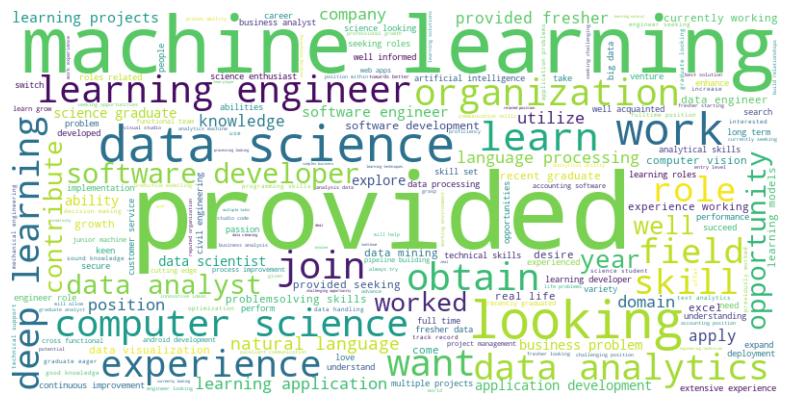

career_category
Other           5656
Engineering     1008
Data Science     906
Management        65
Name: count, dtype: int64


In [54]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Handle missing values
train["career_objective"].fillna("Not Provided", inplace=True)

# Clean text
train["career_objective_cleaned"] = train["career_objective"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Categorize objectives
def categorize_objective(obj):
    if "engineer" in obj:
        return "Engineering"
    elif "manager" in obj:
        return "Management"
    elif "data" in obj:
        return "Data Science"
    else:
        return "Other"

train["career_category"] = train["career_objective_cleaned"].apply(categorize_objective)

# Extract features
train["word_count"] = train["career_objective_cleaned"].str.split().str.len()
train["sentiment"] = train["career_objective_cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else None)

# Visualize
text = ' '.join(train["career_objective_cleaned"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display insights
print(train["career_category"].value_counts())


In [53]:
!pip install wordcloud

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Load and inspect data
# Assume 'train' is your DataFrame
# Replace "matched_score" with your target column
target = "matched_score"
features = train.drop(columns=[target])
labels = train[target]

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 3: Preprocessing
# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

# Step 4: Build the pipeline with a regression model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [56]:
print(mse)

0.012705858322335188


In [57]:
print(mae)

0.0820291009925399


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

# Step 1: Load data and split features/labels
target = "matched_score"
features = train.drop(columns=[target])
labels = train[target]

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 3: Preprocessing setup
# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

# Handle high-cardinality and low-cardinality categorical columns
low_cardinality_cats = [col for col in cat_cols if X_train[col].nunique() < 10]
high_cardinality_cats = [col for col in cat_cols if X_train[col].nunique() >= 10]

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Median for robustness
    ("scaler", StandardScaler())  # Standardize numerical features
])

# Preprocessing for low-cardinality categorical data
low_cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessing for high-cardinality categorical data
high_cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("low_cat", low_cat_transformer, low_cardinality_cats),
        ("high_cat", high_cat_transformer, high_cardinality_cats)
    ],
    remainder="drop"  # Drop unprocessed columns
)

# Step 4: Build pipeline with preprocessing and model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 0.08005035027244771
Root Mean Squared Error (RMSE): 0.10556987031529132
Root Mean Squared Error (MSE): 0.012705858322335188


In [60]:
train_data = train

In [61]:
# Step 1: Create a flag for missing values in 'address'
train_data['address_missing'] = train_data['address'].isnull().astype(int)

# Step 2: Replace missing addresses with "unknown"
train_data['address'].fillna("unknown", inplace=True)

# Step 3: Extract City and State (split by comma)
train_data[['City', 'State']] = train_data['address'].str.split(',', n=1, expand=True)

# Step 4: Clean up whitespace and handle missing parts in City and State
train_data['City'] = train_data['City'].str.strip().fillna("unknown")
train_data['State'] = train_data['State'].str.strip().fillna("unknown")

# Step 5: Flag generalized or placeholder entries in 'address'
generalized_keywords = ['Address', 'City', 'Province', 'Country', 'unknown']
train_data['generalized_address'] = train_data['address'].apply(
    lambda x: int(any(keyword in x for keyword in generalized_keywords))
)

# Display a sample of the cleaned data (Optional)
print(train_data[['address', 'address_missing', 'City', 'State', 'generalized_address']].head(10))

   address  address_missing     City    State  generalized_address
0  unknown                1  unknown  unknown                    1
1  unknown                1  unknown  unknown                    1
2  unknown                1  unknown  unknown                    1
3  unknown                1  unknown  unknown                    1
4  unknown                1  unknown  unknown                    1
5  unknown                1  unknown  unknown                    1
6  unknown                1  unknown  unknown                    1
7  unknown                1  unknown  unknown                    1
8  unknown                1  unknown  unknown                    1
9  unknown                1  unknown  unknown                    1


In [62]:
train_data

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,state,career_objective_cleaned,career_category,career_objective_word_count,word_count,sentiment,address_missing,City,State,generalized_address
0,unknown,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,big data analytics working and database wareho...,Management,41,41,0.183333,1,unknown,unknown,1
1,unknown,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,fresher looking to join as a data analyst and ...,Data Science,21,21,0.650000,1,unknown,unknown,1
2,unknown,Not Provided,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,not provided,Other,2,2,0.000000,1,unknown,unknown,1
3,unknown,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,to obtain a position in a fastpaced business o...,Other,23,23,0.216667,1,unknown,unknown,1
4,unknown,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,NaN,professional accountant with an outstanding wo...,Other,23,23,0.344444,1,unknown,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,"Trenton, NJ",Dedicated and well-rounded software engineer w...,"['HTML', 'CSS', 'JavaScript (Angular)', 'Pytho...",['Princeton International School of Mathematic...,"['Master of Science', 'Bachelor of Science']","['2015', '2012']","['N/A', 'N/A']","[None, None]","['Computer Science', 'Computer Science']",['Princeton International School of Mathematic...,...,NJ,dedicated and wellrounded software engineer wi...,Engineering,66,66,0.177500,0,Trenton,NJ,0
7631,unknown,Want to work as a Machine Learning Production ...,"['Machine Learning Engineer', 'Data Analyst', ...","['AMIT, Bijnor', 'KVIT, Pilani']","['B.Tech', 'M.Tech']","['2017', 'N/A']","['N/A', 'Gold Medalist']","['N/A', 'N/A']","['Electronics/Telecommunication', 'Advanced An...",['Larsen & Toubro'],...,NaN,want to work as a machine learning production ...,Engineering,9,9,0.000000,1,unknown,unknown,1
7632,unknown,Software developer focused in the areas of Mac...,"['Software Engineer', 'Data Analyst', 'Machine...",['Dr. Jagjiban Rao Engineering College'],['B.Tech'],['2019'],[None],[None],['ECE'],['KLP Technology Solutions'],...,NaN,software developer focused in the areas of mac...,Other,22,22,0.500000,1,unknown,unknown,1
7633,unknown,Not Provided,"['Accounting', 'Accounting Software', 'Account...","['University of Kerala', 'Mahatma Gandhi Unive...","['M.Com (Master of Commerce)', 'B.Com (Bachelo...","['N/A', 'N/A']","['N/A', 'N/A']","['N/A', 'N/A']","['N/A', 'N/A']","['Company Name', 'Company Name', 'Company Name...",...,NaN,not provided,Other,2,2,0.000000,1,unknown,unknown,1


In [65]:
train_data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,state,career_objective_cleaned,career_category,career_objective_word_count,word_count,sentiment,address_missing,City,State,generalized_address
0,unknown,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,big data analytics working and database wareho...,Management,41,41,0.183333,1,unknown,unknown,1
1,unknown,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,fresher looking to join as a data analyst and ...,Data Science,21,21,0.650000,1,unknown,unknown,1
2,unknown,Not Provided,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,not provided,Other,2,2,0.000000,1,unknown,unknown,1
3,unknown,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,to obtain a position in a fastpaced business o...,Other,23,23,0.216667,1,unknown,unknown,1
4,unknown,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,NaN,professional accountant with an outstanding wo...,Other,23,23,0.344444,1,unknown,unknown,1


In [66]:
import ast

# Step 1: Handle missing values in 'skills'
train_data['skills'].fillna("unknown", inplace=True)

# Step 2: Parse the list-like string into an actual Python list (for valid rows)
def parse_skills(skill_str):
    try:
        # Convert string to Python list
        return ast.literal_eval(skill_str)
    except (ValueError, SyntaxError):
        # Return an empty list for invalid or placeholder entries
        return []

train_data['skills_parsed'] = train_data['skills'].apply(parse_skills)

# Step 3: Count the number of skills for each row
train_data['num_skills'] = train_data['skills_parsed'].apply(len)

# Step 4: Extract top skills as binary features (Example: Python, SQL, Machine Learning)
top_skills = ['Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Java']
for skill in top_skills:
    train_data[f'has_{skill.replace(" ", "_")}'] = train_data['skills_parsed'].apply(
        lambda skills: int(skill in skills)
    )

# Display a sample of the cleaned and processed 'skills' data (Optional)
print(train_data[['skills', 'skills_parsed', 'num_skills'] + [f'has_{skill.replace(" ", "_")}' for skill in top_skills]].head(10))


                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Business ...   
2  ['Software Development', 'Machine Learning', '...   
3  ['accounts payables', 'accounts receivables', ...   
4  ['Analytical reasoning', 'Compliance testing k...   
5  ['Microsoft Applications', 'Network Security',...   
6  ['Machine Learning', 'Linear Regression', 'Rid...   
7  ['Maintenance', 'Corrective Maintenance', 'Doc...   
8  ['Python', 'Machine Learning', 'MySQL', 'Data ...   
9  ['Django', 'Python', 'Relational databases', '...   

                                       skills_parsed  num_skills  has_Python  \
0  [Big Data, Hadoop, Hive, Python, Mapreduce, Sp...          21           1   
1  [Data Analysis, Data Analytics, Business Analy...          10           0   
2  [Software Development, Machine Learning, Deep ...          14           1   
3  [accounts payables, accounts receivables, Acco...          3

In [67]:
train_data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,City,State,generalized_address,skills_parsed,num_skills,has_Python,has_SQL,has_Machine_Learning,has_Data_Analysis,has_Java
0,unknown,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,unknown,unknown,1,"[Big Data, Hadoop, Hive, Python, Mapreduce, Sp...",21,1,0,1,0,1
1,unknown,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,unknown,unknown,1,"[Data Analysis, Data Analytics, Business Analy...",10,0,0,1,1,0
2,unknown,Not Provided,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,unknown,unknown,1,"[Software Development, Machine Learning, Deep ...",14,1,0,1,0,0
3,unknown,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,unknown,unknown,1,"[accounts payables, accounts receivables, Acco...",36,0,0,0,0,0
4,unknown,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,unknown,unknown,1,"[Analytical reasoning, Compliance testing know...",32,0,0,0,0,0


In [68]:
import re

# Step 1: Handle missing values in 'career_objective'
train_data['career_objective'].fillna("unknown", inplace=True)

# Step 2: Normalize text (convert to lowercase and clean special characters)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

train_data['career_objective_cleaned'] = train_data['career_objective'].apply(clean_text)

# Step 3: Feature Engineering - Create binary flags for common objectives (example: "data", "analyst", "developer")
keywords = ['data', 'analyst', 'developer', 'engineer', 'machine learning', 'software']
for keyword in keywords:
    train_data[f'objective_{keyword.replace(" ", "_")}'] = train_data['career_objective_cleaned'].apply(
        lambda x: int(keyword in x)
    )

# Display a sample of the cleaned and processed 'career_objective' data (Optional)
print(train_data[['career_objective', 'career_objective_cleaned'] + [f'objective_{keyword.replace(" ", "_")}' for keyword in keywords]].head(10))


                                    career_objective  \
0  Big data analytics working and database wareho...   
1  Fresher looking to join as a data analyst and ...   
2                                       Not Provided   
3  To obtain a position in a fast-paced business ...   
4  Professional accountant with an outstanding wo...   
5  To secure an IT specialist, desktop support, n...   
6                                       Not Provided   
7                                       Not Provided   
8  Certified Data analyst with a degree in Electr...   
9                                       Not Provided   

                            career_objective_cleaned  objective_data  \
0  big data analytics working and database wareho...               1   
1  fresher looking to join as a data analyst and ...               1   
2                                       not provided               0   
3  to obtain a position in a fastpaced business o...               0   
4  professional account

In [75]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [76]:
train_data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,extra_curricular_activity_types,extra_curricular_organization_names,extra_curricular_organization_links,role_positions,languages,proficiency_levels,certification_providers,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score,city,state,career_objective_cleaned,career_category,career_objective_word_count,word_count,sentiment,address_missing,City,State,generalized_address,skills_parsed,num_skills,has_Python,has_SQL,has_Machine_Learning,has_Data_Analysis,has_Java,objective_data,objective_analyst,objective_developer,objective_engineer,objective_machine_learning,objective_software
0,unknown,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],[None],['Nov 2019'],['Till Date'],[['Big Data']],['Big Data Analyst'],['N/A'],Technical Support\nTroubleshooting\nCollaborat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000,NaN,NaN,big data analytics working and database wareho...,Management,41,41,0.183333,1,unknown,unknown,1,"[Big Data, Hadoop, Hive, Python, Mapreduce, Sp...",21,1,0,1,0,1,1,0,0,0,0,0
1,unknown,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],['N/A'],['Sep 2019'],['Till Date'],"[['Data Analysis', 'Business Analysis', 'Machi...",['Business Analyst'],['N/A'],Machine Learning Leadership\nCross-Functional ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000,NaN,NaN,fresher looking to join as a data analyst and ...,Data Science,21,21,0.650000,1,unknown,unknown,1,"[Data Analysis, Data Analytics, Business Analy...",10,0,0,1,1,0,1,1,0,0,0,0
2,unknown,Not Provided,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],['N/A'],['June 2018'],['Till Date'],"[['Unified Payment Interface', 'Risk Predictio...",['Software Developer (Machine Learning Enginee...,['N/A'],"Trade Marketing Executive\nBrand Visibility, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667,NaN,NaN,not provided,Other,2,2,0.000000,1,unknown,unknown,1,"[Software Development, Machine Learning, Deep ...",14,1,0,1,0,0,0,0,0,0,0,0
3,unknown,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...","[None, None, None, None, None, None]","['January 2011', 'January 2008', 'January 2006...","['November 2015', 'January 2010', 'January 200...","[['accounts receivables', 'banking', 'G/L Acco...","['Accountant', 'Accounts Receivable Clerk', 'M...","['City, Stat

In [78]:
import re

# Step 1: Handle missing values in 'educational_institution_name'
train_data['educational_institution_name'].fillna("unknown", inplace=True)

# Step 2: Normalize text (convert to lowercase, clean special characters, and standardize)
def clean_institution_name(name):
    name = name.lower()  # Convert to lowercase
    name = re.sub(r'[^a-z\s]', '', name)  # Remove special characters and numbers
    name = re.sub(r'\s+', ' ', name).strip()  # Remove extra spaces
    return name

train_data['educational_institution_name_cleaned'] = train_data['educational_institution_name'].apply(clean_institution_name)

# Step 3: Feature Engineering - Create binary flags for key institution types
keywords = ['university', 'college', 'institute', 'school', 'academy']
for keyword in keywords:
    train_data[f'is_{keyword}'] = train_data['educational_institution_name_cleaned'].apply(
        lambda x: int(keyword in x)
    )

# Step 4: Count the number of words in the institution name
train_data['institution_name_word_count'] = train_data['educational_institution_name_cleaned'].apply(lambda x: len(x.split()))

# Display a sample of the cleaned and processed 'educational_institution_name' data (Optional)
train_data[['educational_institution_name', 'educational_institution_name_cleaned', 'institution_name_word_count'] + [f'is_{keyword}' for keyword in keywords]].head(10)

,educational_institution_name,educational_institution_name_cleaned,institution_name_word_count,is_university,is_college,is_institute,is_school,is_academy
0,['The Amity School of Engineering & Technology...,the amity school of engineering technology ase...,8,0,0,0,1,0
1,"['Delhi University - Hansraj College', 'Delhi ...",delhi university hansraj college delhi univers...,8,1,1,0,0,0
2,"['Birla Institute of Technology (BIT), Ranchi']",birla institute of technology bit ranchi,6,0,0,1,0,0
3,"['Martinez Adult Education, Business Training ...",martinez adult education business training cen...,8,0,0,0,0,0
4,['Kent State University'],kent state university,3,1,0,0,0,0
5,"['Glen Oaks High School', 'Glen Oaks High Scho...",glen oaks high school glen oaks high school,8,0,0,0,1,0
6,['DJR College and University'],djr college and university,4,1,1,0,0,0
7,['POLYTECHNIC UNIVERSITY OF PUERTO RICO'],polytechnic university of puerto rico,5,1,0,0,0,0
8,['Nagpur University'],nagpur university,2,1,0,0,0,0
9,['Dr. Virendra Swaroop Institute of Computer S...,dr virendra swaroop institute of computer stud...,14,0,0,1,0,0


In [79]:
import re

# Step 1: Handle missing values in 'degree_names'
train_data['degree_names'].fillna("unknown", inplace=True)

# Step 2: Normalize text (convert to lowercase, clean special characters, and standardize abbreviations)
def clean_degree_name(name):
    name = name.lower()  # Convert to lowercase
    name = re.sub(r'[^a-z\s]', '', name)  # Remove special characters and numbers
    name = re.sub(r'\s+', ' ', name).strip()  # Remove extra spaces
    # Standardize abbreviations
    name = name.replace('bsc', 'bachelor of science').replace('msc', 'master of science').replace('phd', 'doctor of philosophy')
    return name

train_data['degree_names_cleaned'] = train_data['degree_names'].apply(clean_degree_name)

# Step 3: Feature Engineering - Create binary flags for common degree types
common_degrees = ['bachelor', 'master', 'doctor', 'associate', 'diploma', 'certificate']
for degree in common_degrees:
    train_data[f'is_{degree}'] = train_data['degree_names_cleaned'].apply(
        lambda x: int(degree in x)
    )

# Step 4: Count the number of degrees listed
train_data['num_degrees'] = train_data['degree_names_cleaned'].apply(lambda x: len(x.split(',')))

# Display a sample of the cleaned and processed 'degree_names' data (Optional)
print(train_data[['degree_names', 'degree_names_cleaned', 'num_degrees'] + [f'is_{degree}' for degree in common_degrees]].head(10))


                                        degree_names  \
0                                         ['B.Tech']   
1    ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']   
2                                         ['B.Tech']   
3  ['Computer Applications Specialist Certificate...   
4            ['Bachelor of Business Administration']   
5            ['Bachelor Degree', 'Associate Degree']   
6                                         ['B.Tech']   
7                            ['Bachelor of Science']   
8                                    ['B.Tech/B.E.']   
9                                     ['BCA', 'MCA']   

                                degree_names_cleaned  num_degrees  \
0                                              btech            1   
1  bachelor of science maths master of science sc...            1   
2                                              btech            1   
3  computer applications specialist certificate p...            1   
4                bachelor of business 

In [80]:
train_data

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,extra_curricular_activity_types,extra_curricular_organization_names,extra_curricular_organization_links,role_positions,languages,proficiency_levels,certification_providers,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score,city,state,career_objective_cleaned,career_category,career_objective_word_count,word_count,sentiment,address_missing,City,State,generalized_address,skills_parsed,num_skills,has_Python,has_SQL,has_Machine_Learning,has_Data_Analysis,has_Java,objective_data,objective_analyst,objective_developer,objective_engineer,objective_machine_learning,objective_software,educational_institution_name_cleaned,is_university,is_college,is_institute,is_school,is_academy,institution_name_word_count,degree_names_cleaned,is_bachelor,is_master,is_doctor,is_associate,is_diploma,is_certificate,num_degrees
0,unknown,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],[None],['Nov 2019'],['Till Date'],[['Big Data']],['Big Data Analyst'],['N/A'],Technical Support\nTroubleshooting\nCollaborat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000,NaN,NaN,big data analytics working and database wareho...,Management,41,41,0.183333,1,unknown,unknown,1,"[Big Data, Hadoop, Hive, Python, Mapreduce, Sp...",21,1,0,1,0,1,1,0,0,0,0,0,the amity school of engineering technology ase...,0,0,0,1,0,8,btech,0,0,0,0,0,0,1
1,unknown,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],['N/A'],['Sep 2019'],['Till Date'],"[['Data Analysis', 'Business Analysis', 'Machi...",['Business Analyst'],['N/A'],Machine Learning Leadership\nCross-Functional ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000,NaN,NaN,fresher looking to join as a data analyst and ...,Data Science,21,21,0.650000,1,unknown,unknown,1,"[Data Analysis, Data Analytics, Business Analy...",10,0,0,1,1,0,1,1,0,0,0,0,delhi university hansraj college delhi univers...,1,1,0,0,0,8,bachelor of science maths master of science sc...,1,1,0,0,0,0,1
2,unknown,Not Provided,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],['N/A'],['June 2018'],['Till Date'],"[['Unified Payment Interface', 'Risk Predictio...",['Software Developer (Machine Learning Enginee...,['N/A'],"Trade Marketing Executive\nBrand Visibility, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667,NaN,NaN,not provided,Other,2,2,0.000000,1,unknown,unknown,1,"[Software Development, Machine Learning, Deep ...",14,1,0,1,0,0,0,0,0,0,0,0,birla institute of technology bit ranchi,0,0,1,0,0,6,btech,0,0,0,0,0,0,1
3,unknown,To obtain a position in a fast-paced business ...,"['acc

In [81]:
import re

# Step 1: Handle missing values in 'major_field_of_studies'
train_data['major_field_of_studies'].fillna("unknown", inplace=True)

# Step 2: Normalize text (convert to lowercase, clean special characters, and standardize common terms)
def clean_major_field(field):
    field = field.lower()  # Convert to lowercase
    field = re.sub(r'[^a-z\s]', '', field)  # Remove special characters and numbers
    field = re.sub(r'\s+', ' ', field).strip()  # Remove extra spaces
    # Standardize common terms
    field = field.replace('cs', 'computer science').replace('it', 'information technology').replace('engg', 'engineering')
    return field

train_data['major_field_cleaned'] = train_data['major_field_of_studies'].apply(clean_major_field)

# Step 3: Feature Engineering - Create binary flags for common fields
common_fields = ['computer science', 'engineering', 'business', 'management', 'mathematics', 'finance']
for field in common_fields:
    train_data[f'is_{field.replace(" ", "_")}'] = train_data['major_field_cleaned'].apply(
        lambda x: int(field in x)
    )

# Step 4: Count the number of fields listed
train_data['num_fields'] = train_data['major_field_cleaned'].apply(lambda x: len(x.split(',')))

# Display a sample of the cleaned and processed 'major_field_of_studies' data (Optional)
train_data[['major_field_of_studies', 'major_field_cleaned', 'num_fields'] + [f'is_{field.replace(" ", "_")}' for field in common_fields]].head(10)


,major_field_of_studies,major_field_cleaned,num_fields,is_computer_science,is_engineering,is_business,is_management,is_mathematics,is_finance
0,['Electronics'],electronicomputer science,1,1,0,0,0,0,0
1,"['Mathematics', 'Statistics']",mathematicomputer science statisticomputer sci...,1,1,0,0,0,0,0
2,['Electronics/Telecommunication'],electronicomputer sciencetelecommunication,1,1,0,0,0,0,0
3,['Computer Applications'],computer applications,1,0,0,0,0,0,0
4,['Accounting'],accounting,1,0,0,0,0,0,0
5,['Electronics and Communications Engineering T...,electronicomputer science and communications e...,1,1,1,0,0,0,0
6,['IT'],information technology,1,0,0,0,0,0,0
7,['Electrical Engineering'],electrical engineering,1,0,1,0,0,0,0
8,['Electronics/Telecommunication'],electronicomputer sciencetelecommunication,1,1,0,0,0,0,0
9,"['Computers', 'Computers']",computers computers,1,0,0,0,0,0,0


In [83]:
import re

# Step 1: Expand the synonym mapping for more comprehensive standardization
extended_field_mapping = {
    r'\bcs\b': 'computer science',
    r'\bcomp sci\b': 'computer science',
    r'\bcomputer engineering\b': 'computer science',
    r'\bit\b': 'information technology',
    r'\binfo tech\b': 'information technology',
    r'\bengg\b': 'engineering',
    r'\beng\b': 'engineering',
    r'\bmech eng\b': 'mechanical engineering',
    r'\belec eng\b': 'electrical engineering',
    r'\bmath\b': 'mathematics',
    r'\bstat\b': 'mathematics',
    r'\bquant\b': 'mathematics',
    r'\bbiz\b': 'business',
    r'\bmgt\b': 'management',
    r'\bfin\b': 'finance',
    r'\bcomm eng\b': 'communication engineering'
}

# Step 2: Apply advanced standardization logic
def advanced_standardize_field(field):
    field = field.lower()  # Convert to lowercase
    field = re.sub(r'[^a-z\s]', '', field)  # Remove special characters and numbers
    field = re.sub(r'\s+', ' ', field).strip()  # Remove extra spaces
    for pattern, replacement in extended_field_mapping.items():
        field = re.sub(pattern, replacement, field)  # Replace patterns with standardized terms
    return field

train_data['major_field_advanced_cleaned'] = train_data['major_field_of_studies'].apply(advanced_standardize_field)

# Step 3: Update binary flags for standardized terms
refined_fields = ['computer science', 'engineering', 'business', 'management', 'mathematics', 'finance']
for field in refined_fields:
    train_data[f'is_{field.replace(" ", "_")}'] = train_data['major_field_advanced_cleaned'].apply(
        lambda x: int(field in x)
    )

# Step 4: Count the number of standardized fields listed
train_data['num_fields_advanced'] = train_data['major_field_advanced_cleaned'].apply(lambda x: len(x.split(',')))

# Display a sample of the further refined 'major_field_of_studies' data (Optional)
print(train_data[['major_field_of_studies', 'major_field_advanced_cleaned', 'num_fields_advanced'] + [f'is_{field.replace(" ", "_")}' for field in refined_fields]].head(10))


                              major_field_of_studies  \
0                                    ['Electronics']   
1                      ['Mathematics', 'Statistics']   
2                  ['Electronics/Telecommunication']   
3                          ['Computer Applications']   
4                                     ['Accounting']   
5  ['Electronics and Communications Engineering T...   
6                                             ['IT']   
7                         ['Electrical Engineering']   
8                  ['Electronics/Telecommunication']   
9                         ['Computers', 'Computers']   

                        major_field_advanced_cleaned  num_fields_advanced  \
0                                        electronics                    1   
1                             mathematics statistics                    1   
2                       electronicstelecommunication                    1   
3                              computer applications                    1  

In [84]:
import ast

# Handle missing values
train_data['skills_required'].fillna("unknown", inplace=True)

# Parse and process the skills
def parse_skills_required(skill_str):
    try:
        return ast.literal_eval(skill_str)  # Convert string to Python list
    except (ValueError, SyntaxError):
        return []  # Return an empty list for invalid entries

train_data['skills_required_parsed'] = train_data['skills_required'].apply(parse_skills_required)

# Create binary flags for top skills
top_skills = ['Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Java']
for skill in top_skills:
    train_data[f'has_required_{skill.replace(" ", "_")}'] = train_data['skills_required_parsed'].apply(
        lambda skills: int(skill in skills)
    )

# Count the number of required skills
train_data['num_skills_required'] = train_data['skills_required_parsed'].apply(len)

# Display sample
print(train_data[['skills_required', 'skills_required_parsed', 'num_skills_required'] + [f'has_required_{skill.replace(" ", "_")}' for skill in top_skills]].head(10))


                                     skills_required skills_required_parsed  \
0                                            unknown                     []   
1                                            unknown                     []   
2  Brand Promotion\nCampaign Management\nField Su...                     []   
3  Fast typing skill\nIELTSInternet browsing & on...                     []   
4  iOS\niOS App Developer\niOS Application Develo...                     []   
5  Python\nR or Java\nTensorFlow\nPyTorch\nScikit...                     []   
6  iOS\niOS App Developer\niOS Application Develo...                     []   
7  iOS\niOS App Developer\niOS Application Develo...                     []   
8       Maintenance  and Troubleshooting\nMechanical                     []   
9  Fast typing skill\nIELTSInternet browsing & on...                     []   

   num_skills_required  has_required_Python  has_required_SQL  \
0                    0                    0                 0   


In [85]:
# Handle missing values
train_data['responsibilities'].fillna("unknown", inplace=True)

# Normalize text
def clean_responsibilities(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

train_data['responsibilities_cleaned'] = train_data['responsibilities'].apply(clean_responsibilities)

# Extract key terms
keywords = ['team', 'project', 'management', 'development', 'analysis']
for keyword in keywords:
    train_data[f'responsible_for_{keyword}'] = train_data['responsibilities_cleaned'].apply(
        lambda x: int(keyword in x)
    )

# Display sample
print(train_data[['responsibilities', 'responsibilities_cleaned'] + [f'responsible_for_{keyword}' for keyword in keywords]].head(10))


                                    responsibilities  \
0  Technical Support\nTroubleshooting\nCollaborat...   
1  Machine Learning Leadership\nCross-Functional ...   
2  Trade Marketing Executive\nBrand Visibility, S...   
3  Apparel Sourcing\nQuality Garment Sourcing\nRe...   
4  iOS Lifecycle\nRequirement Analysis\nNative Fr...   
5  Machine Learning Design\nData Analysis\nModel ...   
6  iOS Lifecycle\nRequirement Analysis\nNative Fr...   
7  iOS Lifecycle\nRequirement Analysis\nNative Fr...   
8  Machinery Maintenance\nTroubleshooting\nReport...   
9  Apparel Sourcing\nQuality Garment Sourcing\nRe...   

                            responsibilities_cleaned  responsible_for_team  \
0  technical support troubleshooting collaboratio...                     0   
1  machine learning leadership crossfunctional co...                     1   
2  trade marketing executive brand visibility sal...                     0   
3  apparel sourcing quality garment sourcing reli...                   

In [86]:
# Handle missing values
train_data['age_requirement'].fillna("unknown", inplace=True)

# Extract minimum and maximum age
def parse_age(age_str):
    age_str = age_str.lower()
    match = re.search(r'(\d+)\s*(to|-)?\s*(\d+)?', age_str)  # Match ranges like "22 to 30 years"
    if match:
        min_age = int(match.group(1))
        max_age = int(match.group(3)) if match.group(3) else min_age
        return min_age, max_age
    return None, None

train_data['min_age'], train_data['max_age'] = zip(*train_data['age_requirement'].apply(parse_age))

# Display sample
print(train_data[['age_requirement', 'min_age', 'max_age']].head(10))


      age_requirement  min_age  max_age
0             unknown      NaN      NaN
1             unknown      NaN      NaN
2             unknown      NaN      NaN
3  Age 22 to 30 years     22.0     30.0
4             unknown      NaN      NaN
5             unknown      NaN      NaN
6             unknown      NaN      NaN
7             unknown      NaN      NaN
8  Age 25 to 40 years     25.0     40.0
9  Age 22 to 30 years     22.0     30.0


In [98]:
train["skills"].isnull().sum()

43

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
def preprocess_company_names(company_names):
    try:
        # Handle None values
        if company_names is None:
            return []
        # Convert string representation of lists into Python lists
        company_list = ast.literal_eval(company_names) if isinstance(company_names, str) else []
        # Normalize company names: lowercase, strip whitespace
        company_list = [name.strip().lower() for name in company_list if isinstance(name, str)]
        return company_list
    except (ValueError, SyntaxError):
        # Return an empty list for invalid entries
        return []

# Apply preprocessing and redo the feature engineering
train_data['processed_company_names'] = train_data['professional_company_names'].apply(preprocess_company_names)
train_data['num_companies'] = train_data['processed_company_names'].apply(len)
train_data['company_names_str'] = train_data['processed_company_names'].apply(lambda x: ' '.join(x))

# Encoding with CountVectorizer
vectorizer = CountVectorizer(max_features=100, stop_words='english')
company_features = vectorizer.fit_transform(train_data['company_names_str'])

# Convert sparse matrix to DataFrame for easier integration
company_features_df = pd.DataFrame(
    company_features.toarray(),
    columns=[f"company_{feature}" for feature in vectorizer.get_feature_names_out()]
)

# Combine features with the main DataFrame
train_data = pd.concat([train_data, company_features_df], axis=1)


In [104]:
from IPython.display import display
display(train_data)

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,extra_curricular_activity_types,extra_curricular_organization_names,extra_curricular_organization_links,role_positions,languages,proficiency_levels,certification_providers,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score,city,state,career_objective_cleaned,career_category,career_objective_word_count,word_count,sentiment,address_missing,City,State,generalized_address,skills_parsed,num_skills,has_Python,has_SQL,has_Machine_Learning,has_Data_Analysis,has_Java,objective_data,objective_analyst,objective_developer,objective_engineer,objective_machine_learning,objective_software,educational_institution_name_cleaned,is_university,is_college,is_institute,is_school,is_academy,institution_name_word_count,degree_names_cleaned,is_bachelor,is_master,is_doctor,is_associate,is_diploma,is_certificate,num_degrees,major_field_cleaned,is_computer_science,is_engineering,is_business,is_management,is_mathematics,is_finance,num_fields,major_field_advanced_cleaned,num_fields_advanced,skills_required_parsed,has_required_Python,has_required_SQL,has_required_Machine_Learning,has_required_Data_Analysis,has_required_Java,num_skills_required,responsibilities_cleaned,responsible_for_team,responsible_for_project,responsible_for_management,responsible_for_development,responsible_for_analysis,min_age,max_age,processed_company_names,num_companies,company_names_str,company_academy,company_accenture,company_aeronix,company_aerospace,company_ames,company_amz,company_analytics,company_bank,company_beckman,company_biomedical,company_blueocean,company_british,company_ca,company_care,company_center,company_cepton,company_city,company_cognizant,company_collins,company_columbia,company_company,company_computer,company_consultancy,company_consultants,company_coulter,company_data,company_department,company_enterprises,company_erc,company_experts,company_foundation,company_global,company_google,company_graphics,company_group,company_gusto,company_hcl,company_health,company_help,company_home,company_hub,company_illinois,company_india,company_indosis,company_information,company_infotech,company_institute,company_international,company_irrm,company_jp,company_kentucky,company_labs,company_larsen,company_limited,company_loans,company_mahindra,company_management,company_mathematics,company_mathworks,company_media,company_meta,company_microsoft,company_mortgages,company_mountain,company_nanyang,company_nasa,company_netalytics,company_nsu,company_pittsburgh,company_publicis,company_pvt,company_research,company_sapient,company_science,company_services,company_sikkim,company_slu,company_software,company_solution,company_solutions,company_sons,company_state,company_stream,company_student,company_systems,company_tata,company_tech,company_technological,company_technologies,company_technology,company_toubro,company_university,company_usa,company_value,company_valve,company_view,company_warsaw,company_york,company_zf,company_ï¼,company_academy,company_accenture,company_aeronix,company_aerospace,company_ames,company_amz,company_analytics,company_bank,company_beckman,company_biomedical,company_blueocean,company_british,company_ca,company_care,company_center,company_cepton,company_city,company_cognizant,company_collins,company_columbia,company_company,company_computer,company_consultancy,company_consultants,company_coulter,company_data,company_department,company_enterprises,company_erc,company_experts,company_foundation,company_global,company_google,company_graphics,company_group,company_gusto,company_hcl,company_health,company_help,company_home,company_hub,company_illinois,company_india,co

In [107]:
train.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')